In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.11'

## First, lets show how ridiculous Bakkers errors are

In [ ]:
# df=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\DeVitre_TM_Comparison.xlsx')
# df_Kil=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Charlottes_Tm_data_diffNeLines\DeVitre_TM_Comparison.xlsx', sheet_name='Kil')


In [3]:
df = pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                            sheet_name='Fogo_Tm_Raman_DW2023')
df_Kil=pd.read_excel(r'C:\Users\penny\Box\Berkeley_new\Raman\Raman technical paper\Supporting_Info\Supporting_information_Draft1.xlsx',
                            sheet_name='Kil_Raman_DW2023')

In [4]:
Density_Tm=pf.calculate_CO2_density_homog_T(T_h_C=df['Temp'], EOS='SW96', homog_to='L', set_to_critical=True)
Density_Tm.head()

found some with too high temps, are setting to 30.9782C - the max homog T 


,Bulk_gcm3,Liq_gcm3,Gas_gcm3,T_h_C,homog_to
0,0.605542,0.605542,0.333628,29.707460,L
1,0.640447,0.640447,0.302099,28.601599,L
2,0.674511,0.674511,0.272538,27.093606,L
3,0.601542,0.601542,0.337318,29.807993,L
4,0.601542,0.601542,0.337318,29.807993,L


In [5]:
df_c['Corrected ΔCO2 1σ (cm-1)']
df_1117_1447_02=pf.calculate_density_ucb(corrected_split=df_c['Corrected ΔCO2 (cm-1)'], split_err=0.2,
CI_split=0.67, CI_neon=0.67)

NameError: name 'df_c' is not defined

In [6]:
df_c=df.copy()
df_c=df_c.loc[Density_Tm['Bulk_gcm3']>0.53]

df_1117_1447_02=pf.calculate_density_ucb(corrected_split=df_c['Corrected ΔCO2 (cm-1)'], split_err=0.2,
CI_split=0.67, CI_neon=0.67)
df_1117_1447_02.head()

df_1117_1447_01=pf.calculate_density_ucb(corrected_split=df_c['Corrected ΔCO2 (cm-1)'], split_err=0.1,
CI_split=0.67, CI_neon=0.67)
df_1117_1447_01.head()

,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Preferred D_σ_Ne,Preferred D_σ_pkfit,in range,Notes,LowD_RT,HighD_RT,LowD_SC,LowD_SC_σ,MedD_SC,MedD_SC_σ,HighD_SC,HighD_SC_σ,Temperature
0,0.593061,0.048592,0.048534,0.002369,104.131310,0,0,Y,"SupCrit, Med density",NaN,NaN,0.547229,0.040322,0.593061,0.048592,0.596526,0.049813,SupCrit
1,0.611677,0.049042,0.048985,0.002373,104.169500,0,0,Y,"SupCrit, Med density",NaN,NaN,0.562362,0.040356,0.611677,0.049042,0.615384,0.048998,SupCrit
2,0.655516,0.050127,0.050071,0.002382,104.258043,0,0,Y,"SupCrit, Med density",NaN,NaN,0.597446,0.040440,0.655516,0.050127,0.657906,0.047106,SupCrit
3,0.587776,0.048465,0.048407,0.002368,104.120403,0,0,Y,"SupCrit, Med density",NaN,NaN,0.542908,0.040312,0.587776,0.048465,0.591083,0.050046,SupCrit
4,0.592512,0.048578,0.048521,0.002369,104.130179,0,0,Y,"SupCrit, Med density",NaN,NaN,0.546781,0.040321,0.592512,0.048578,0.595963,0.049837,SupCrit


In [7]:

## Lets calculate errors on microthermometry
Av_outputs_02C, All_outputs_02C=pf.propagate_microthermometry_uncertainty(T_h_C=df_c['Temp'],
 error_T_h_C=df_c['Error_to_use']+0.01, N_dup=1000,
EOS='SW96', 
error_dist_T_h_C='uniform', error_type_T_h_C='Abs', set_to_critical=True)
Av_outputs_02C.head()

found some with too high temps, are setting to 30.9782C - the max homog T 
found some with too high temps, are setting to 30.9782C - the max homog T 


,Sample_ID,Density_Gas_noMC,Density_Liq_noMC,Mean_density_Gas_gcm3,Std_density_Gas_gcm3,Std_density_Gas_gcm3_from_percentiles,Std_density_Liq_gcm3_from_percentiles,Mean_density_Liq_gcm3,Std_density_Liq_gcm3,Input_temp,error_T_h_C
0,0,0.333628,0.605542,0.333624,0.004391,0.005232,0.005684,0.605558,0.004769,29.707460,0.21
1,1,0.302099,0.640447,0.302218,0.002873,0.003393,0.003831,0.640318,0.003244,28.601599,0.21
2,2,0.272538,0.674511,0.272577,0.002038,0.002424,0.002853,0.674469,0.002399,27.093606,0.21
3,3,0.337318,0.601542,0.337322,0.004552,0.005264,0.005694,0.601550,0.004923,29.807993,0.21
4,4,0.337318,0.601542,0.337382,0.004561,0.005332,0.005768,0.601485,0.004933,29.807993,0.21


(array([ 7., 12., 15., 14.,  4.,  2.,  2.,  0.,  0.,  2.]),
 array([0.00121062, 0.00271555, 0.00422047, 0.0057254 , 0.00723032,
        0.00873525, 0.01024017, 0.0117451 , 0.01325002, 0.01475495,
        0.01625987]),
 <BarContainer object of 10 artists>)

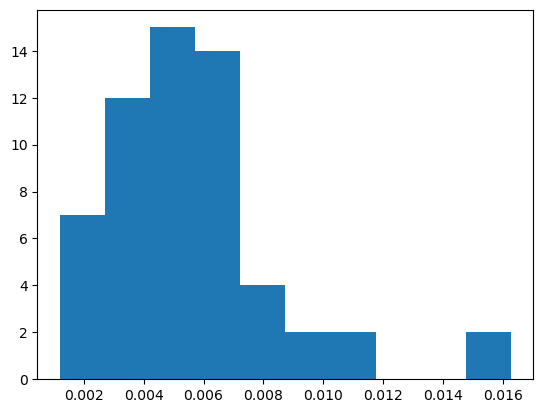

In [8]:
plt.hist(df_c['CO2 density 1σ from DiadFit (g/cm3)'])

In [9]:
split_range=np.linspace(np.min(df_c['Corrected ΔCO2 (cm-1)']), np.max(df_c['Corrected ΔCO2 (cm-1)']), 100)
df_1117_1447_01=pf.calculate_density_ucb(corrected_split=pd.Series(split_range), split_err=0.1,
CI_split=0.67, CI_neon=0.67)
df_1117_1447_02=pf.calculate_density_ucb(corrected_split=pd.Series(split_range), split_err=0.2,
CI_split=0.67, CI_neon=0.67)
df_1117_1447_03=pf.calculate_density_ucb(corrected_split=pd.Series(split_range), split_err=0.3,
CI_split=0.67, CI_neon=0.67)
df_1117_1447_01.head()
#plt.plot(df_1117_1447_02['Density g/cm3'], df_1117_1447_02['σ Density g/cm3'], '.r')



,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Preferred D_σ_Ne,Preferred D_σ_pkfit,in range,Notes,LowD_RT,HighD_RT,LowD_SC,LowD_SC_σ,MedD_SC,MedD_SC_σ,HighD_SC,HighD_SC_σ,Temperature
0,0.473908,0.045866,0.045805,0.002353,103.878440,0,0,Y,"SupCrit, Med density",NaN,NaN,0.447032,0.040122,0.473908,0.045866,0.463800,0.055215,SupCrit
1,0.479798,0.045993,0.045933,0.002353,103.891285,0,0,Y,"SupCrit, Med density",NaN,NaN,0.452122,0.040131,0.479798,0.045993,0.470871,0.054941,SupCrit
2,0.485705,0.046122,0.046062,0.002354,103.904129,0,0,Y,"SupCrit, Med density",NaN,NaN,0.457211,0.040140,0.485705,0.046122,0.477907,0.054666,SupCrit
3,0.491628,0.046252,0.046192,0.002354,103.916974,0,0,Y,"SupCrit, Med density",NaN,NaN,0.462301,0.040150,0.491628,0.046252,0.484908,0.054392,SupCrit
4,0.497569,0.046383,0.046323,0.002355,103.929819,0,0,Y,"SupCrit, Med density",NaN,NaN,0.467390,0.040159,0.497569,0.046383,0.491874,0.054118,SupCrit


In [10]:
Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles'].head()

0    0.005684
1    0.003831
2    0.002853
3    0.005694
4    0.005768
Name: Std_density_Liq_gcm3_from_percentiles, dtype: float64

## Bakker data
- Figure 16a - 0.1477 g/cm3, Figure 16b - 0.8880 g/cm3
- 

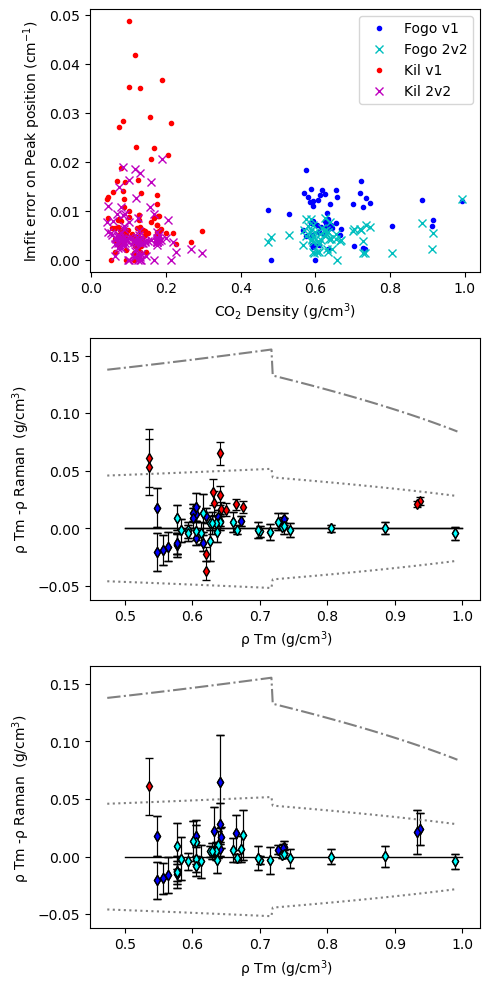

In [11]:
fig, ((ax0, ax1, ax2)) = plt.subplots(3, 1, figsize = (5,10))
# a) is plotting the errors on peak position from lmfit. 
#ax0.set_title('a) Peak fitting Errors')
ax0.plot(df_c['CO2 density (g/cm3)'], df_c['ν1_Combofit_position_error (cm-1)'],
'.b', label='Fogo v1')
ax0.plot(df_c['CO2 density (g/cm3)'], df_c['2ν2_Combofit_position_error (cm-1)'],
'xc',  label='Fogo 2v2')

ax0.plot(df_Kil['CO2 density (g/cm3)'], df_Kil['ν1_Combofit_position_error (cm-1)'],
'.r', label='Kil v1')
ax0.plot(df_Kil['CO2 density (g/cm3)'], df_Kil['2ν2_Combofit_position_error (cm-1)'],
'xm',  label='Kil 2v2')
ax0.legend()


ax0.set_xlabel('CO$_2$ Density (g/cm$^3$)')
ax0.set_ylabel('lmfit error on Peak position (cm$^{-1}$)')


# This is translating those errors into densities, and combining the diadfit error and the uncertainty on the microthermometry homog
#ax1.set_title('b)')
#ax1.plot([0.4, 1], [0.4, 1], '-k')
yerr_meas=(df_c['CO2 density 1σ from DiadFit (g/cm3)']**2+Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles']**2)**0.5
withinerr=(np.abs(Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)']))<yerr_meas
withinerr2=(np.abs(Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)']))<2*yerr_meas

ax1.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[~withinerr], 
Av_outputs_02C['Density_Liq_noMC'].loc[~withinerr]-df_c['CO2 density (g/cm3)'].loc[~withinerr], xerr=0,
yerr=yerr_meas.loc[~withinerr],fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=5, capsize=3, mec='k')

ax1.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[withinerr2], 
Av_outputs_02C['Density_Liq_noMC'].loc[withinerr2]-df_c['CO2 density (g/cm3)'].loc[withinerr2], xerr=0,
yerr=yerr_meas.loc[withinerr2],fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=5, capsize=3, mec='k')

ax1.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[withinerr], 
Av_outputs_02C['Density_Liq_noMC'].loc[withinerr]-df_c['CO2 density (g/cm3)'].loc[withinerr], xerr=0,
yerr=yerr_meas.loc[withinerr],fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, capsize=3, mec='k')




ax1.plot([0.5, 1], [0, 0], '-k', lw=1)
#ax1.legend()
# Lets do the same thing but where charlotte did repeated mesaurements. 
#ax2.set_title('c)')
yerr_meas=(df_c['CO2 density st.dev. of repeated measurements (g/cm3)']**2+Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles']**2)**0.5
has2meas=df_c['CO2 density st.dev. of repeated measurements (g/cm3)']>0
withinerr=(np.abs(Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)']))<yerr_meas
withinerr2=(np.abs(Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)']))<2*yerr_meas

ax2.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[~withinerr&has2meas], 
Av_outputs_02C['Density_Liq_noMC'].loc[~withinerr&has2meas]-df_c['CO2 density (g/cm3)'].loc[~withinerr&has2meas], xerr=0,
yerr=yerr_meas.loc[~withinerr&has2meas],fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=5, capsize=3, mec='k')

ax2.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[withinerr2&has2meas], 
Av_outputs_02C['Density_Liq_noMC'].loc[withinerr2&has2meas]-df_c['CO2 density (g/cm3)'].loc[withinerr2&has2meas], xerr=0,
yerr=yerr_meas.loc[withinerr2&has2meas],fmt='d', ecolor='k', elinewidth=0.8, mfc='blue', ms=5, capsize=3, mec='k')

ax2.errorbar(Av_outputs_02C['Density_Liq_noMC'].loc[withinerr&has2meas], 
Av_outputs_02C['Density_Liq_noMC'].loc[withinerr&has2meas]-df_c['CO2 density (g/cm3)'].loc[withinerr&has2meas], xerr=0,
yerr=yerr_meas.loc[withinerr&has2meas],fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, capsize=3, mec='k')



ax1.plot([0.5, 1], [0, 0], '-k', lw=1)

TM_err=np.nanmean(Av_outputs_02C['Std_density_Liq_gcm3_from_percentiles'])
ax1.plot(df_1117_1447_01['Density g/cm3'], 
(df_1117_1447_01['σ Density g/cm3']), ':', color='grey', label='σ Δ = 0.1 cm$^{-1}')
ax1.plot(df_1117_1447_03['Density g/cm3'], 
(df_1117_1447_03['σ Density g/cm3']), '-.', color='grey', label='σ Δ = 0.3 cm$^{-1}')
ax1.plot(df_1117_1447_01['Density g/cm3'], -(df_1117_1447_01['σ Density g/cm3']),
 ':', color='grey')

# This is showing errors 
ax2.plot(df_1117_1447_01['Density g/cm3'], df_1117_1447_01['σ Density g/cm3'], ':', color='grey', label='σ Δ = 0.1 cm$^{-1}$')
ax2.plot(df_1117_1447_03['Density g/cm3'], df_1117_1447_03['σ Density g/cm3'], '-.', color='grey', label='σ Δ = 0.2 cm$^{-1}$')
ax2.plot(df_1117_1447_01['Density g/cm3'], -df_1117_1447_01['σ Density g/cm3'], ':', color='grey')
# ax2.errorbar(Av_outputs_02C['Density_Liq_noMC'], 
# Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)'], xerr=0,
# yerr=(df_1117_1447_02['σ Density g/cm3']**2+Av_outputs_02C['Std_density_Gas_gcm3_from_percentiles']**2)**0.5,
#              fmt='d', ecolor='cyan', elinewidth=0.8, mfc='cyan', ms=0, capsize=3, mec='k', label='0.2 cm$^{-1}$ Split error')


# ax2.errorbar(Av_outputs_02C['Density_Liq_noMC'], 
# Av_outputs_02C['Density_Liq_noMC']-df_c['CO2 density (g/cm3)'], xerr=0,
# yerr=(df_1117_1447_01['σ Density g/cm3']**2+Av_outputs_02C['Std_density_Gas_gcm3_from_percentiles']**2)**0.5,
#              fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=3, capsize=3, mec='k',  label='0.1 cm$^{-1}$ Split error')
# ax2.plot([0.5, 1], [0, 0], '-r')
ax2.plot([0.5, 1], [0, 0], '-k', lw=1)
ax1.set_ylim()
#ax2.legend()
ax1.set_xlabel(' ρ Tm (g/cm$^3$) ')
ax1.set_ylabel('ρ Tm -ρ Raman  (g/cm$^3$) ')
ax2.set_xlabel(' ρ Tm (g/cm$^3$) ')
ax2.set_ylabel('ρ Tm -ρ Raman  (g/cm$^3$) ')
ax2.yaxis.set_tick_params(which='both', labelbottom=True)
fig.tight_layout()
fig.savefig('DeVitre_error comparison.png', dpi=200)